<a href="https://colab.research.google.com/github/vaibhavitiwarii/Facial-Emotion-Regonition/blob/main/FacialEmotionRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries


In [ ]:
!pip install -q face_recognition
!pip install -q fer


import face_recognition
from fer import FER


import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
%matplotlib inline


import PIL.Image


import time

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Camera Capture



In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();


      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);


      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

capture the photo from the webcam


<IPython.core.display.Javascript object>

Saved to photo.jpg


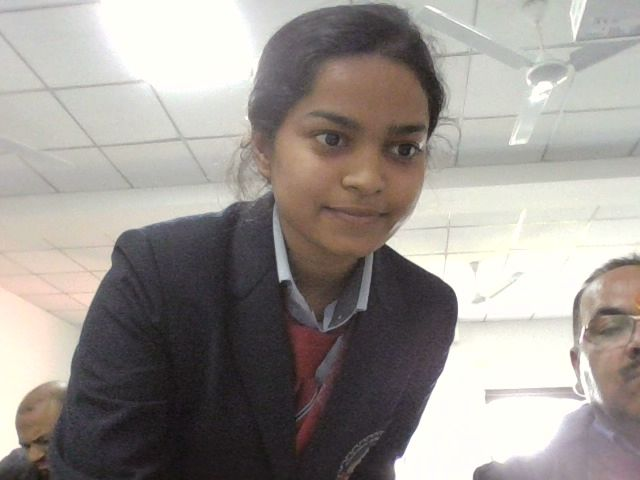

In [ ]:
from IPython.display import Image

try:
  photo = take_photo()
  print('Saved to {}'.format(photo))


  display(Image(photo))
except Exception as err:

  print(str(err))

Load and display the image

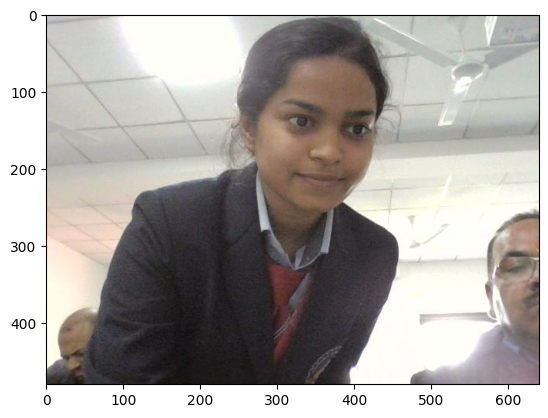

In [ ]:
image = face_recognition.load_image_file(photo)
im = PIL.Image.open(photo)
fig=plt.subplots()
imshow(im)

Face detection

Nb of faces: 1
Time taken: 0.21 s


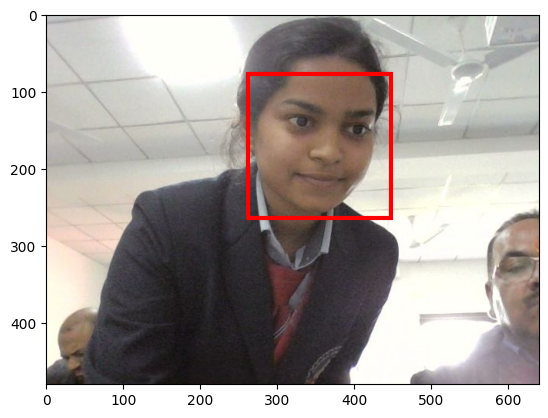

In [ ]:

start = time.time()


face_locations = face_recognition.face_locations(image, model="CNN")

fig,ax = plt.subplots()


for face_location in face_locations:


    top, right, bottom, left = face_location
    ax.imshow(im)


    rect = patches.Rectangle((left,top), (right-left), (bottom-top), \
                              linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)


end = time.time()

print("Nb of faces:", len(face_locations))
print("Time taken:", round(end-start,2), "s")

FaceEmotion detection

In [ ]:
detector = FER(mtcnn=True) #using accurate MTCNN network

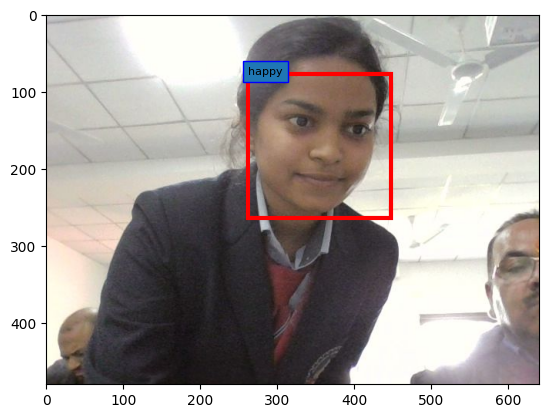

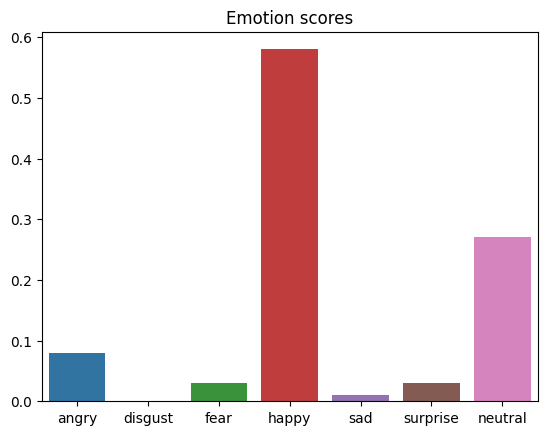

Top emotion: happy
Score: 0.58
Nb of faces: 1
Time taken: 7.49 s


In [ ]:

start = time.time()


face_locations = face_recognition.face_locations(image, model="CNN")

fig, ax = plt.subplots()


for face_location in face_locations:


    top, right, bottom, left = face_location

    ax.imshow(im)


    rect = patches.Rectangle((left,top), (right-left), (bottom-top), \
                             linewidth=3, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    face_image = image[top:bottom, left:right]


    emotions = detector.detect_emotions(face_image)
    emotion, score = detector.top_emotion(face_image)
    plt.text(left, top, emotion, fontsize=8, bbox=dict(fill=True, edgecolor='blue', linewidth=1))


end = time.time()
plt.show()


plt.figure()
plt.title("Emotion scores")
keys = list(emotions[0]["emotions"].keys())
vals = list(emotions[0]["emotions"].values())
sns.barplot(x=keys, y=vals)
plt.show()


print("Top emotion:", emotion)
print("Score:", score)
print("Nb of faces:",len(face_locations))
print("Time taken:", round(end-start, 2) ,"s")